<a href="https://colab.research.google.com/github/agungtriu/Belajar-Pengembangan-Machine-Learning/blob/master/Submission_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv \
  -O /content/BBCNews.csv

--2020-08-05 17:16:22--  https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.188.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [text/csv]
Saving to: ‘/content/BBCNews.csv’

/content/BBCNews.cs 100%[===================>]   4.82M  --.-KB/s    in 0.03s   

2020-08-05 17:16:23 (191 MB/s) - ‘/content/BBCNews.csv’ saved [5057493/5057493]



In [2]:
import pandas as pd
df = pd.read_csv('BBCNews.csv')
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [3]:
category = pd.get_dummies(df.category)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='category')
df_baru

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,how political squabbles snowball it s become c...,0,0,1,0,0


In [4]:
news = df_baru['text'].values
label = df_baru[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [5]:
from sklearn.model_selection import train_test_split
news_train, news_test, label_train, label_test = train_test_split(news, label, test_size=0.2)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(news_train) 
tokenizer.fit_on_texts(news_test)
 
sekuens_latih = tokenizer.texts_to_sequences(news_train)
sekuens_test = tokenizer.texts_to_sequences(news_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [6]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='nadam',metrics=['accuracy'])

In [7]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      print("\nAkurasi pada training set dan validation set telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [8]:
num_epochs = 50
history = model.fit(padded_latih, label_train, epochs=num_epochs, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/50
56/56 - 134s - loss: 1.6314 - accuracy: 0.2309 - val_loss: 1.5837 - val_accuracy: 0.3798
Epoch 2/50
56/56 - 135s - loss: 1.4779 - accuracy: 0.3736 - val_loss: 1.1365 - val_accuracy: 0.4831
Epoch 3/50
56/56 - 140s - loss: 1.2139 - accuracy: 0.4539 - val_loss: 1.0560 - val_accuracy: 0.5213
Epoch 4/50
56/56 - 136s - loss: 1.0604 - accuracy: 0.5309 - val_loss: 0.9332 - val_accuracy: 0.6067
Epoch 5/50
56/56 - 135s - loss: 0.8564 - accuracy: 0.6247 - val_loss: 0.9645 - val_accuracy: 0.5888
Epoch 6/50
56/56 - 134s - loss: 0.6509 - accuracy: 0.7466 - val_loss: 0.5256 - val_accuracy: 0.7888
Epoch 7/50
56/56 - 139s - loss: 0.5197 - accuracy: 0.8337 - val_loss: 0.6211 - val_accuracy: 0.7506
Epoch 8/50
56/56 - 134s - loss: 0.2404 - accuracy: 0.9315 - val_loss: 0.6217 - val_accuracy: 0.8022
Epoch 9/50
56/56 - 135s - loss: 0.1620 - accuracy: 0.9607 - val_loss: 0.4815 - val_accuracy: 0.8315
Epoch 10/50
56/56 - 134s - loss: 0.0822 - accuracy: 0.9787 - val_loss: 0.4089 - val_accuracy: 0.8787

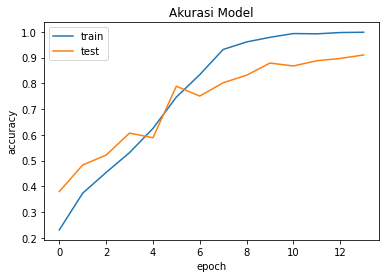

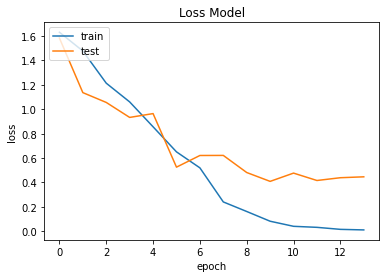

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()